# Importing Libraries

In [8]:
import librosa
import numpy as np
import tensorflow as tf
import keras
import os
import pandas as pd
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix

In [5]:
actorlist = os.listdir('Audio')
mydir = 'Audio/'
mylist = os.listdir(mydir)
#Did the directory load correctly?
print(mylist[2][:5]=="Actor")

True


In [6]:
actorlist.sort()
print(actorlist)

['.DS_Store', 'Actor_01', 'Actor_02', 'Actor_03', 'Actor_04', 'Actor_05', 'Actor_06', 'Actor_07', 'Actor_08', 'Actor_09', 'Actor_10', 'Actor_11', 'Actor_12', 'Actor_13', 'Actor_14', 'Actor_15', 'Actor_16', 'Actor_17', 'Actor_18', 'Actor_19', 'Actor_20', 'Actor_21', 'Actor_22', 'Actor_23', 'Actor_24']


## Compiling a list of feeling labels given Actor audio files

In [7]:
feeling_list=[]
mydir = 'Audio/'
for actor in actorlist:
    try:
        mylist = os.listdir(mydir+actor)
        mylist.sort()
        for item in mylist:

            if item[6:-16]=='01' and int(item[18:-4])%2==0:
                feeling_list.append('female_neutral')
            elif item[6:-16]=='01' and int(item[18:-4])%2==1:
                feeling_list.append('male_neutral')

            if item[6:-16]=='02' and int(item[18:-4])%2==0:
                feeling_list.append('female_calm')
            elif item[6:-16]=='02' and int(item[18:-4])%2==1:
                feeling_list.append('male_calm')

            elif item[6:-16]=='03' and int(item[18:-4])%2==0:
                feeling_list.append('female_happy')
            elif item[6:-16]=='03' and int(item[18:-4])%2==1:
                feeling_list.append('male_happy')

            elif item[6:-16]=='04' and int(item[18:-4])%2==0:
                feeling_list.append('female_sad')
            elif item[6:-16]=='04' and int(item[18:-4])%2==1:
                feeling_list.append('male_sad')

            elif item[6:-16]=='05' and int(item[18:-4])%2==0:
                feeling_list.append('female_angry')
            elif item[6:-16]=='05' and int(item[18:-4])%2==1:
                feeling_list.append('male_angry')

            elif item[6:-16]=='06' and int(item[18:-4])%2==0:
                feeling_list.append('female_fearful')
            elif item[6:-16]=='06' and int(item[18:-4])%2==1:
                feeling_list.append('male_fearful')

            if item[6:-16]=='07' and int(item[18:-4])%2==0:
                feeling_list.append('female_disgust')
            elif item[6:-16]=='07' and int(item[18:-4])%2==1:
                feeling_list.append('male_disgust')

            if item[6:-16]=='08' and int(item[18:-4])%2==0:
                feeling_list.append('female_surpise')
            elif item[6:-16]=='08' and int(item[18:-4])%2==1:
                feeling_list.append('male_surprise')
                
    except: pass


## Generating a Pandas DataFrame from list of emotion labels

In [16]:
labels = pd.DataFrame(feeling_list)

In [17]:
labels

,0
0,male_neutral
1,male_neutral
2,male_neutral
3,male_neutral
4,male_calm
5,male_calm
6,male_calm
7,male_calm
8,male_calm
9,male_calm


## Go through each Actor directory and run MFCC analysis on each sound file. Populate a Pandas DataFrame with the MFCC's

In [18]:
df = pd.DataFrame(columns=['feature'])
bookmark=0
for index,actor in enumerate(actorlist):
    print(index, actor)
    try:
        recordinglist = os.listdir('Audio/'+actor)
        for index, recording in enumerate(recordinglist):
            X, sample_rate = librosa.load('Audio/'+actor+'/'+recording, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
            sample_rate = np.array(sample_rate)
            mfccs = np.mean(librosa.feature.mfcc(y=X, 
                                                sr=sample_rate, 
                                                n_mfcc=13),
                            axis=0)
            feature = mfccs
            df.loc[bookmark] = [feature]
            bookmark=bookmark+1
    except: pass

0 .DS_Store
1 Actor_01
2 Actor_02
3 Actor_03
4 Actor_04
5 Actor_05
6 Actor_06
7 Actor_07
8 Actor_08
9 Actor_09
10 Actor_10
11 Actor_11
12 Actor_12
13 Actor_13
14 Actor_14
15 Actor_15
16 Actor_16
17 Actor_17
18 Actor_18
19 Actor_19
20 Actor_20
21 Actor_21
22 Actor_22
23 Actor_23
24 Actor_24


## Further formatting of the DataFrame

In [19]:
featuresDf = pd.DataFrame(df['feature'].values.tolist())

In [20]:
featuresDf

,0,1,2,3,4,5,6,7,8,9,...,206,207,208,209,210,211,212,213,214,215
0,-61.862374,-61.862374,-61.862374,-61.862374,-61.862374,-61.862374,-61.862374,-61.862374,-61.862374,-61.862374,...,-61.862374,-61.862374,-61.761406,-60.348411,-60.160468,-61.384289,-60.519129,-61.495963,-61.862374,-60.531564
1,-61.508001,-61.508001,-61.508001,-61.508001,-61.508001,-61.508001,-61.508001,-61.508001,-61.508001,-61.508001,...,-61.508001,-61.508001,-61.508001,-61.508001,-61.508001,-61.508001,-61.508001,-61.508001,-61.508001,-61.508001
2,-55.663086,-56.170336,-56.157848,-54.663471,-55.166778,-56.156944,-56.156944,-56.156944,-56.156944,-56.156944,...,-55.155076,-56.156944,-56.156944,-56.156944,-55.844215,-56.156944,-56.156944,-56.156944,-56.156944,-56.156944
3,-63.523530,-63.523530,-63.523530,-63.523530,-63.523530,-63.377373,-61.595853,-63.160227,-63.523530,-63.523530,...,-39.336517,-39.847823,-40.466040,-40.448086,-42.883065,-43.367558,-46.280296,-48.273818,-49.745182,-50.472916
4,-54.985143,-54.914563,-54.937813,-56.227640,-56.685268,-57.022505,-58.089938,-58.376127,-58.420398,-56.623606,...,-41.046524,-42.297510,-41.002176,-41.728109,-41.608780,-43.741884,-45.259488,-44.909683,-44.988356,-44.630824
5,-67.736151,-67.778018,-66.746144,-65.957883,-67.736151,-67.736151,-67.736151,-67.258683,-67.736151,-67.736151,...,-61.192877,-61.116259,-63.291237,-65.844225,-65.121000,-59.515303,-59.591485,-66.712170,-67.736151,-67.736151
6,-61.560626,-61.560626,-61.560626,-61.560626,-61.560626,-61.560626,-61.560626,-61.560626,-61.560626,-61.560626,...,-55.407579,-53.844575,-54.260574,-55.809029,-54.627146,-53.186850,-53.998237,-53.535159,-57.203741,-59.989199
7,-57.414988,-57.414988,-57.414988,-57.414988,-57.414988,-57.414988,-57.414988,-57.414988,-57.414988,-57.414988,...,-27.840106,-27.892961,-29.425555,-31.255728,-34.011845,-34.322584,-33.564934,-36.074428,-37.658693,-38.917999
8,-60.369038,-60.083715,-60.978925,-60.952456,-60.982486,-60.983948,-60.981255,-60.981255,-60.981255,-60.249618,...,-48.786174,-49.848358,-49.632920,-55.102587,-55.481730,-52.952234,-51.401589,-54.072970,-52.639566,-52.664178
9,-73.841370,-73.841370,-73.841370,-73.719655,-73.841370,-73.841370,-73.841370,-73.303635,-72.806811,-73.841370,...,-51.629344,-50.568866,-53.505840,-54.222252,-51.545521,-52.573785,-54.786292,-56.344280,-57.508212,-56.577322


In [21]:
labeledDf = pd.concat([featuresDf, labels], axis=1)
named = labeledDf.rename(index=str, columns={"0":"label"})
from sklearn.utils import shuffle
renamed = shuffle(named)

## Check that we've renamed the label column

In [25]:
renamed[:10]

,0,1,2,3,4,5,6,7,8,9,...,207,208,209,210,211,212,213,214,215,0
367,-53.133584,-51.621921,-50.581897,-49.668774,-50.286505,-49.964845,-50.168253,-51.606322,-51.470555,-51.469320,...,-35.231115,-36.302066,-38.165984,-38.553552,-38.876953,-39.633979,-40.578886,-40.554632,-37.297943,female_happy
769,-58.956170,-54.020999,-51.573192,-50.621153,-49.813810,-49.045556,-47.124024,-46.842374,-44.322249,-37.736601,...,-57.088482,-56.237510,-51.040688,-50.723357,-51.787521,-51.630080,-51.765043,-50.528577,-48.031336,male_sad
296,-37.270206,-36.990828,-36.722902,-36.375004,-36.586611,-36.283742,-35.950162,-36.626541,-37.213265,-37.326705,...,-26.920854,-26.990753,-28.376821,-28.539639,-27.780616,-27.824729,-29.130181,-30.429309,-31.471188,female_surpise
1169,-67.128017,-67.128017,-67.128017,-67.128017,-67.128017,-67.128017,-67.128017,-67.128017,-67.128017,-67.128017,...,-52.192277,-53.082673,-54.695262,-52.384729,-53.175544,-54.981104,-54.078131,-54.207101,-56.474811,male_sad
648,-64.968015,-64.772304,-64.687746,-67.406882,-69.081301,-69.081301,-68.135362,-69.081301,-69.081301,-68.585113,...,-66.094323,-69.081301,-67.553305,-65.936145,-61.907557,-64.350280,-64.105109,-58.917328,-56.868422,male_happy
569,-61.856277,-59.841213,-59.137161,-59.362694,-59.033707,-58.838229,-58.639865,-58.646047,-59.653037,-62.066008,...,-56.521849,-58.689703,-58.885860,-57.405611,-55.915186,-54.769278,-56.704969,-56.083979,-56.884752,male_disgust
903,-47.653127,-47.970525,-49.740429,-48.870251,-48.412381,-48.586070,-46.137917,-44.980714,-45.339035,-43.265135,...,-41.613457,-41.199245,-41.278683,-40.271696,-41.093706,-42.307928,-42.091122,-41.195688,-42.858647,male_fearful
739,-66.381714,-66.381714,-66.381714,-66.381714,-66.381714,-66.381714,-66.381714,-66.381714,-66.381714,-66.381714,...,-61.171275,-61.669714,-62.798737,-61.998073,-61.092887,-61.562312,-60.977360,-63.447309,-62.772071,female_disgust
409,-53.335289,-54.241193,-52.663250,-53.006688,-52.754686,-52.673515,-51.280820,-52.471202,-52.866072,-51.250867,...,-50.534440,-53.663415,-52.179736,-51.837947,-52.804880,-53.821589,-55.641643,-54.456297,-51.380699,female_surpise
659,-57.354619,-56.764098,-56.161156,-57.752327,-57.455185,-55.104433,-56.519281,-61.743307,-62.724118,-60.338742,...,-61.687915,-62.345600,-59.201399,-57.919858,-57.302353,-57.860759,-59.635965,-59.327224,-62.622069,male_sad


## Fill empty cells with zeroes, then split into training and validation sets

In [26]:
renamed = renamed.fillna(0)
divider = np.random.rand(len(renamed)) < 0.75
train = renamed[divider]
test = renamed[~divider]
train[250:260]
trainfeatures = train.iloc[:, :-1]
trainlabel = train.iloc[:, -1:]
testfeatures = test.iloc[:, :-1]
testlabel = test.iloc[:, -1:]

## Format the sets for Keras processing

In [31]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

X_train = np.array(trainfeatures)
y_train = np.array(trainlabel)
X_test = np.array(testfeatures)
y_test = np.array(testlabel)

lb = LabelEncoder()

y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

/Users/lucaslyon/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [33]:
X_train.shape

(909, 216)

## Padding the sequences

In [34]:
x_traincnn =np.expand_dims(X_train, axis=2)
x_testcnn= np.expand_dims(X_test, axis=2)

Pad sequences


## Generate the Keras model

In [10]:
model = Sequential()

model.add(Conv1D(128, 5,padding='same',
                 input_shape=(216,1)))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(16))
model.add(Activation('softmax'))
opt = keras.optimizers.rmsprop(lr=0.00001, decay=1e-6)

In [12]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='Attempt-1Architecture.png', show_shapes=True, show_layer_names=True)

## Compile and begin training

In [37]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

In [39]:
cnnhistory=model.fit(x_traincnn, y_train, batch_size=16, epochs=20, validation_data=(x_testcnn, y_test))

Train on 909 samples, validate on 328 samples
Epoch 1/20
909/909 [==============================] - 77s 85ms/step - loss: 2.8364 - acc: 0.0759 - val_loss: 2.7543 - val_acc: 0.0671
Epoch 2/20
909/909 [==============================] - 76s 84ms/step - loss: 2.7687 - acc: 0.0803 - val_loss: 2.7618 - val_acc: 0.0701
Epoch 3/20
909/909 [==============================] - 76s 84ms/step - loss: 2.7688 - acc: 0.0770 - val_loss: 2.7634 - val_acc: 0.0671
Epoch 4/20
909/909 [==============================] - 82s 90ms/step - loss: 2.7592 - acc: 0.0825 - val_loss: 2.7619 - val_acc: 0.0884
Epoch 5/20
909/909 [==============================] - 81s 89ms/step - loss: 2.7573 - acc: 0.0781 - val_loss: 2.7656 - val_acc: 0.1006
Epoch 6/20
909/909 [==============================] - 65s 71ms/step - loss: 2.7474 - acc: 0.0792 - val_loss: 2.7676 - val_acc: 0.0823
Epoch 7/20
909/909 [==============================] - 65s 72ms/step - loss: 2.7457 - acc: 0.0869 - val_loss: 2.7633 - val_acc: 0.0762
Epoch 8/20
909/9

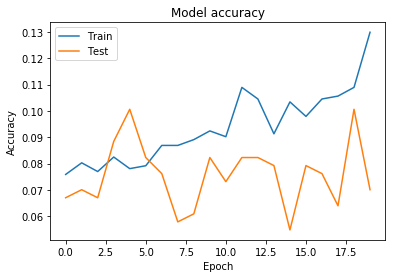

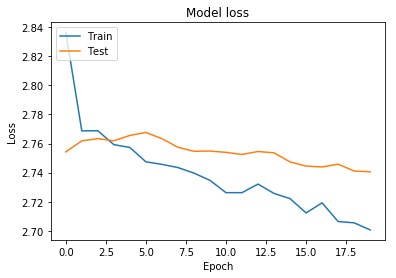

In [42]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(cnnhistory.history['acc'])
plt.plot(cnnhistory.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()